In [214]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patheffects as path_effects
import numpy as np
import pandas as pd
import highlight_text as htext
import requests
from PIL import Image
from io import BytesIO

In [2]:
cols = ['game_id','epa','season_type','season','week','drive','series','down','ydstogo','wp','ep','yardline_100','posteam','defteam','game_seconds_remaining']

In [4]:
import nfl_data_py as nfl
df_pbp = nfl.import_pbp_data(years=[2021], columns=cols, downcast=True, cache=False)
# df_pbp = pd.read_csv("nfl_pbp_data.csv")
df_pbp

2021 done.
Downcasting floats.


,game_id,epa,season_type,week,drive,series,down,ydstogo,wp,ep,yardline_100,posteam,defteam,game_seconds_remaining,season
0,2021_01_ARI_TEN,0.000000,REG,1,NaN,1.0,NaN,0.0,0.546262,1.474098,NaN,None,None,3600.0,2021
1,2021_01_ARI_TEN,0.000000,REG,1,1.0,1.0,NaN,0.0,0.546262,1.474098,35.0,TEN,ARI,3600.0,2021
2,2021_01_ARI_TEN,-1.399805,REG,1,1.0,1.0,1.0,10.0,0.546262,1.474098,75.0,TEN,ARI,3600.0,2021
3,2021_01_ARI_TEN,0.032412,REG,1,1.0,1.0,2.0,13.0,0.520599,0.074293,78.0,TEN,ARI,3563.0,2021
4,2021_01_ARI_TEN,-1.532898,REG,1,1.0,1.0,3.0,10.0,0.498319,0.106705,75.0,TEN,ARI,3522.0,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50707,2021_22_LA_CIN,-1.215366,POST,22,25.0,53.0,3.0,1.0,0.331002,1.838844,49.0,CIN,LA,48.0,2021
50708,2021_22_LA_CIN,0.000000,POST,22,25.0,53.0,NaN,0.0,0.212148,0.623479,NaN,None,None,43.0,2021
50709,2021_22_LA_CIN,-0.623479,POST,22,25.0,53.0,4.0,1.0,0.212148,0.623479,49.0,CIN,LA,43.0,2021
50710,2021_22_LA_CIN,0.000000,POST,22,26.0,54.0,1.0,10.0,0.958877,0.000000,51.0,LA,CIN,39.0,2021


In [5]:
# group by posteam, season, drive, week. sum on epa, [sum OR average (median)]? of ydstogo
df = df_pbp[cols]
groupby = ['posteam','season','week','down'] # ,'week','down'
df = df.groupby(groupby).agg({'ydstogo':'mean','epa':'mean','yardline_100':'mean','drive':'count'})
df.reset_index(inplace=True)
df

,posteam,season,week,down,ydstogo,epa,yardline_100,drive
0,ARI,2021,1,1.0,9.806452,-0.049851,41.580647,31
1,ARI,2021,1,2.0,8.407408,0.211352,38.481480,27
2,ARI,2021,1,3.0,5.642857,0.518092,41.000000,14
3,ARI,2021,1,4.0,9.000000,-0.678658,40.166668,6
4,ARI,2021,2,1.0,10.000000,0.375154,53.433334,30
...,...,...,...,...,...,...,...,...
2273,WAS,2021,17,4.0,10.000000,-0.058411,47.000000,6
2274,WAS,2021,18,1.0,10.000000,0.215654,49.959999,25
2275,WAS,2021,18,2.0,7.526316,0.066549,45.684212,19
2276,WAS,2021,18,3.0,6.214286,-0.781012,42.000000,14


In [6]:
team = 'SF'
season = 2021
week = 18

df = df[((df['posteam']==team)&(df['season']==season))]
df

,posteam,season,week,down,ydstogo,epa,yardline_100,drive
1982,SF,2021,1,1.0,9.758620,0.028752,50.034481,29
1983,SF,2021,1,2.0,7.388889,0.363990,47.166668,18
1984,SF,2021,1,3.0,9.666667,0.615409,43.888889,9
1985,SF,2021,1,4.0,7.400000,-0.668315,38.400002,5
1986,SF,2021,2,1.0,9.870968,0.047924,60.161289,31
...,...,...,...,...,...,...,...,...
2057,SF,2021,20,4.0,10.142858,-0.402593,52.000000,7
2058,SF,2021,21,1.0,10.208333,-0.170605,56.416668,24
2059,SF,2021,21,2.0,8.750000,0.383640,54.049999,20
2060,SF,2021,21,3.0,7.636364,-0.496941,53.636364,11


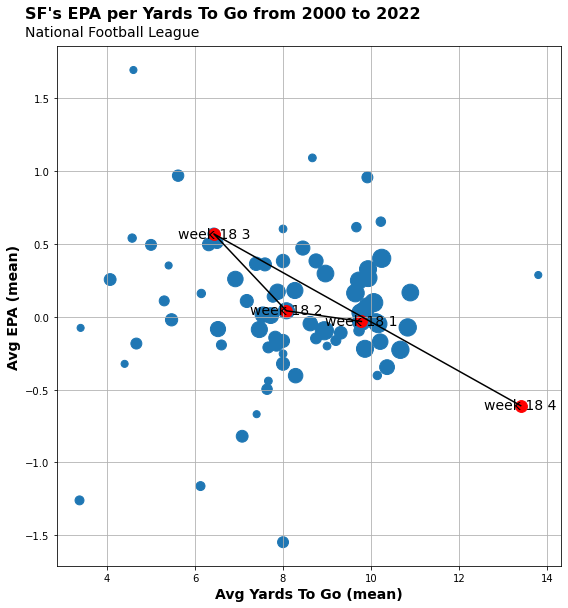

In [7]:
fig, ax = plt.subplots(figsize=(8,8))

ax.grid()
x = df.ydstogo.tolist()
y = df.epa.tolist()
size = (df.drive*10).tolist()

ax.scatter(x,y,s=size)

x = df[df.week == week].ydstogo.tolist()
y = df[df.week == week].epa.tolist()
size = (df[df.week == week]*10).drive.tolist()
t = zip(df[df.week == week].week, df[df.week == week].down)

ax.plot(x,y, color='k')

for point in zip(x,y,size,t):
    ax.scatter(point[0],point[1],color='r',s=size[2])
    t= ax.text(point[0],point[1]-0.025,'week {} {}'.format(point[-1][0],int(point[-1][1])), color='k', fontsize=14,ha="center")


fig.text(0.05,1,"{}'s EPA per Yards To Go from 2000 to 2022\n".format(team), fontsize=16, fontweight="bold")
fig.text(0.05,1,"National Football League",fontweight="regular", fontsize=14)

ax.set_xlabel("Avg Yards To Go (mean)", fontweight="bold", fontsize=14)
ax.set_ylabel("Avg EPA (mean)" ,fontweight="bold", fontsize=14)

plt.tight_layout()
plt.show()

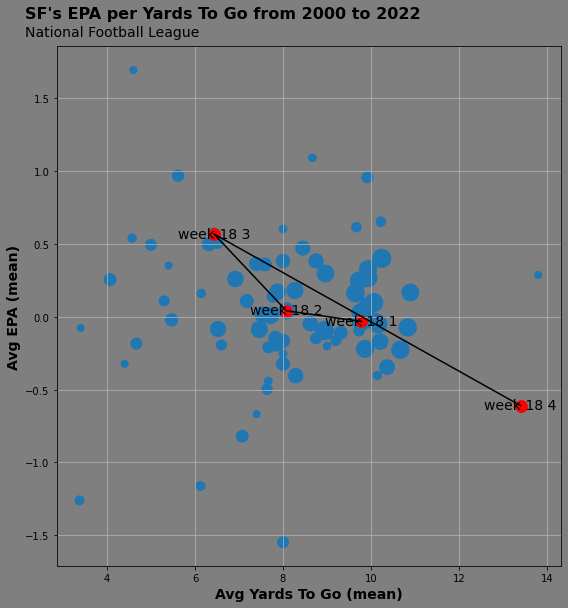

In [8]:
# add background colors

background = "#7f7f7f"

fig, ax = plt.subplots(figsize=(8,8))
fig.set_facecolor(background)
ax.patch.set_facecolor(background)

ax.grid()
x = df.ydstogo.tolist()
y = df.epa.tolist()
size = (df.drive*10).tolist()

ax.scatter(x,y,s=size)


x = df[df.week == week].ydstogo.tolist()
y = df[df.week == week].epa.tolist()
size = (df[df.week == week]*10).drive.tolist()
t = zip(df[df.week == week].week, df[df.week == week].down)

ax.plot(x,y, color='k')

for point in zip(x,y,size,t):
    ax.scatter(point[0],point[1],color='r',s=size[2])
    t= ax.text(point[0],point[1]-0.025,'week {} {}'.format(point[-1][0],int(point[-1][1])), color='k', fontsize=14,ha="center")


fig.text(0.05,1,"{}'s EPA per Yards To Go from 2000 to 2022\n".format(team), fontsize=16, fontweight="bold")
fig.text(0.05,1,"National Football League",fontweight="regular", fontsize=14)

ax.set_xlabel("Avg Yards To Go (mean)", fontweight="bold", fontsize=14)
ax.set_ylabel("Avg EPA (mean)" ,fontweight="bold", fontsize=14)

plt.tight_layout()
plt.show()

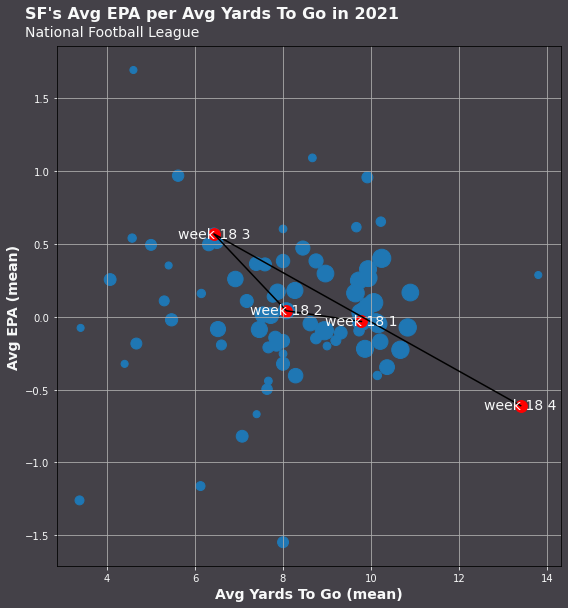

In [9]:
# adjust background color and text color

background = "#444148"
text_color = "#F8F9F9"
mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color


fig, ax = plt.subplots(figsize=(8,8))
fig.set_facecolor(background)
ax.patch.set_facecolor(background)

ax.grid()
x = df.ydstogo.tolist()
y = df.epa.tolist()
size = (df.drive*10).tolist()

ax.scatter(x,y,s=size)


x = df[df.week == week].ydstogo.tolist()
y = df[df.week == week].epa.tolist()
size = (df[df.week == week]*10).drive.tolist()
t = zip(df[df.week == week].week, df[df.week == week].down)

ax.plot(x,y, color='k')

for point in zip(x,y,size,t):
    ax.scatter(point[0],point[1],color='r',s=size[2])
    t= ax.text(point[0],point[1]-0.025,'week {} {}'.format(point[-1][0],int(point[-1][1])), color=text_color, fontsize=14,ha="center")


fig.text(0.05,1,"{}'s Avg EPA per Avg Yards To Go in {}\n".format(team, season), color=text_color, fontsize=16, fontweight="bold")
fig.text(0.05,1,"National Football League",fontweight="regular", color=text_color, fontsize=14)

ax.set_xlabel("Avg Yards To Go (mean)", fontweight="bold",color=text_color, fontsize=14)
ax.set_ylabel("Avg EPA (mean)" ,fontweight="bold",color=text_color, fontsize=14)

plt.tight_layout()
plt.show()

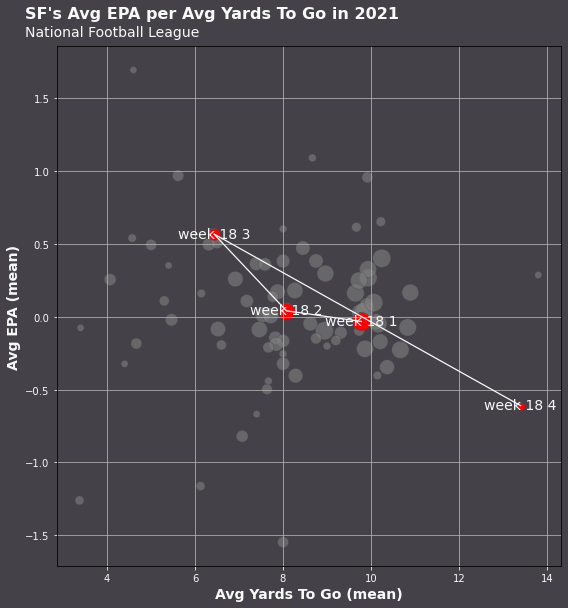

In [10]:
# adjust colors of background context data points


background = "#444148"
text_color = "#F8F9F9"
filler_color = "grey"
primary_color = "red"
mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color


fig, ax = plt.subplots(figsize=(8,8))
fig.set_facecolor(background)
ax.patch.set_facecolor(background)

ax.grid()
x = df.ydstogo.tolist()
y = df.epa.tolist()
size = (df.drive*10).tolist()

ax.scatter(x,y,s=size, color=filler_color, edgecolors=background, alpha=0.6, lw=0.5)


x = df[df.week == week].ydstogo.tolist()
y = df[df.week == week].epa.tolist()
size = (df[df.week == week]*10).drive.tolist()
t = zip(df[df.week == week].week, df[df.week == week].down)

ax.plot(x,y, color=text_color, lw=1.25)

for point in zip(x,y,size,t):
    ax.scatter(point[0],point[1],color=primary_color,edgecolors=background,lw=0.25,s=point[2])
    t= ax.text(point[0],point[1]-0.025,'week {} {}'.format(point[-1][0],int(point[-1][1])), color=text_color, fontsize=14,ha="center")


fig.text(0.05,1,"{}'s Avg EPA per Avg Yards To Go in {}\n".format(team, season), color=text_color, fontsize=16, fontweight="bold")
fig.text(0.05,1,"National Football League",fontweight="regular", color=text_color, fontsize=14)

ax.set_xlabel("Avg Yards To Go (mean)", fontweight="bold",color=text_color, fontsize=14)
ax.set_ylabel("Avg EPA (mean)" ,fontweight="bold",color=text_color, fontsize=14)

plt.tight_layout()
plt.show()

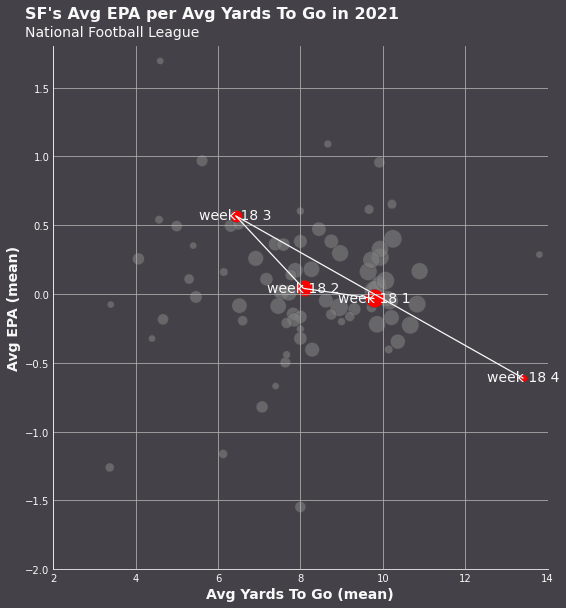

In [11]:
# remove ticks and adjust color and set range for each axis

background = "#444148"
text_color = "#F8F9F9"
filler_color = "grey"
primary_color = "red"
mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color


fig, ax = plt.subplots(figsize=(8,8))
fig.set_facecolor(background)
ax.patch.set_facecolor(background)

ax.grid()

x = df.ydstogo.tolist()
y = df.epa.tolist()
size = (df.drive*10).tolist()

ax.scatter(x,y,s=size, color=filler_color, edgecolors=background, alpha=0.6, lw=0.5)


x = df[df.week == week].ydstogo.tolist()
y = df[df.week == week].epa.tolist()
size = (df[df.week == week]*10).drive.tolist()
t = zip(df[df.week == week].week, df[df.week == week].down)

ax.plot(x,y, color=text_color, lw=1.25)

for point in zip(x,y,size,t):
    ax.scatter(point[0],point[1],color=primary_color,edgecolors=background,lw=0.25,s=point[2])
    t= ax.text(point[0],point[1]-0.025,'week {} {}'.format(point[-1][0],int(point[-1][1])), color=text_color, fontsize=14,ha="center")


fig.text(0.05,1,"{}'s Avg EPA per Avg Yards To Go in {}\n".format(team, season), color=text_color, fontsize=16, fontweight="bold")
fig.text(0.05,1,"National Football League",fontweight="regular", color=text_color, fontsize=14)

ax.set_xlabel("Avg Yards To Go (mean)", fontweight="bold",color=text_color, fontsize=14)
ax.set_ylabel("Avg EPA (mean)" ,fontweight="bold",color=text_color, fontsize=14)

ax.set_xlim(2,14)
ax.set_ylim(-2,1.8)

ax.tick_params(axis="both",length=0)

spines = ["top", "right", "bottom", "left"]
for s in spines:
    if s in ["top","right"]:
        ax.spines[s].set_visible(False)
    else:
        ax.spines[s].set_color(text_color)

plt.tight_layout()
plt.show()

In [56]:
# add font family
import matplotlib.font_manager
mpl_fm = matplotlib.font_manager.fontManager.addfont(path='/home/friend/Downloads/Akzidenz-grotesk-light.ttf')
mpl_fm = matplotlib.font_manager.fontManager.addfont(path='/home/friend/Downloads/Akzidenz-grotesk-bold.ttf')
mpl_fm = matplotlib.font_manager.fontManager.addfont(path='/home/friend/Downloads/Akzidenz-grotesk-black.ttf')
mpl_fm = matplotlib.font_manager.fontManager.addfont(path='/home/friend/Downloads/Akzidenz-grotesk-roman.ttf')

# confirm font family is added
from IPython.core.display import HTML
def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))

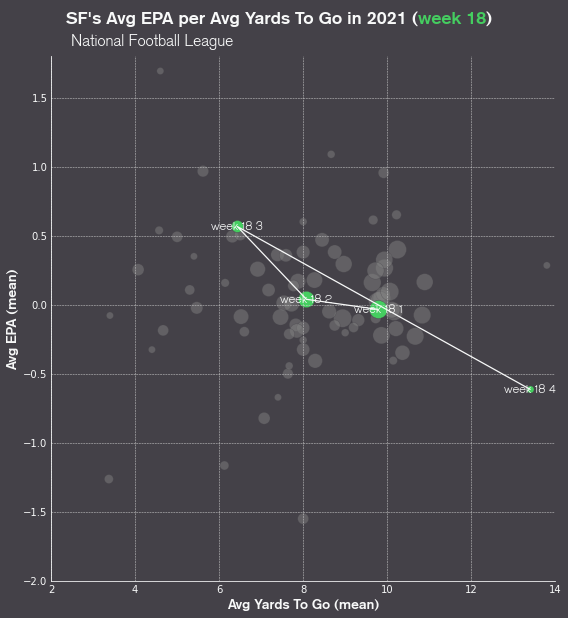

In [134]:
# adjust grid
# highlight and choose font
# adjust title alignment

font1 = "Mallanna"
font2 =  "AkzidenzGrotesk"
font3 = "Loma"
background = "#444148"
text_color = "#F8F9F9"
filler_color = "grey"
primary_color = "#45Cd60"

title = "{}'s Avg EPA per Avg Yards To Go in {} (<week {}>)\n"
subtitle = "National Football League"

mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color


fig, ax = plt.subplots(figsize=(8,8))
fig.set_facecolor(background)
ax.patch.set_facecolor(background)

ax.grid(ls="--", lw=0.5, color="lightgrey", zorder=1)

x = df.ydstogo.tolist()
y = df.epa.tolist()
size = (df.drive*10).tolist()

ax.scatter(x,y,s=size, color=filler_color, edgecolors=background, alpha=0.5, lw=0.5)

x = df[df.week == week].ydstogo.tolist()
y = df[df.week == week].epa.tolist()
size = (df[df.week == week]*10).drive.tolist()
t = zip(df[df.week == week].week, df[df.week == week].down)

ax.plot(x,y, color=text_color, lw=1.25)

for point in zip(x,y,size,t):
    ax.scatter(point[0],point[1],color=primary_color,edgecolors=background,lw=0.25,s=point[2])
    t= ax.text(point[0],point[1]-0.025,'week {} {}'.format(point[-1][0],int(point[-1][1])), color=text_color, fontweight="light", fontfamily=font1, fontsize=14,ha="center")

htext.fig_text(s=title.format(team, season, week),x=0.12, y=1.06, highlight_textprops=[{"color":primary_color,"fontweight":"bold"}], color=text_color, fontsize=18, fontweight="bold", fontfamily=font2)
fig.text(0.13,1, subtitle, fontweight="light", color=text_color,fontfamily=font2, fontsize=16)

ax.set_xlabel("Avg Yards To Go (mean)", fontweight="bold",color=text_color,fontfamily=font2, fontsize=14)
ax.set_ylabel("Avg EPA (mean)" ,fontweight="bold",color=text_color,fontfamily=font2, fontsize=14)

ax.set_xlim(2,14)
ax.set_ylim(-2,1.8)

ax.tick_params(axis="both",length=0)

spines = ["top", "right", "bottom", "left"]
for s in spines:
    if s in ["top","right"]:
        ax.spines[s].set_visible(False)
    else:
        ax.spines[s].set_color(text_color)

plt.tight_layout()
plt.show()

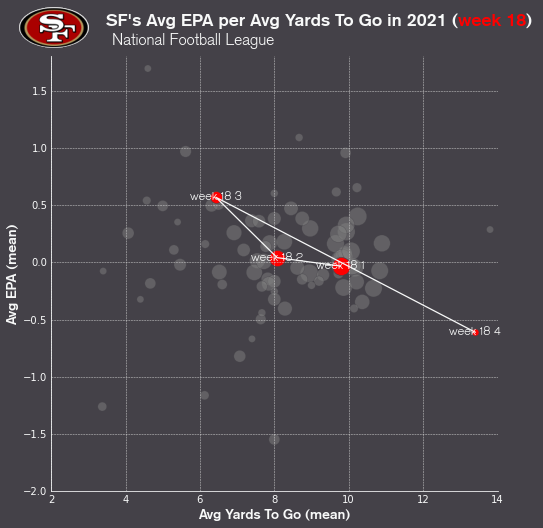

In [205]:
# add logo

font1 = "Mallanna"
font2 =  "AkzidenzGrotesk"
font3 = "Loma"
background = "#444148"
text_color = "#F8F9F9"
filler_color = "grey"
primary_color = "red"

title = "{}'s Avg EPA per Avg Yards To Go in {} (<week {}>)\n"
subtitle = "National Football League"

mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color


fig, ax = plt.subplots(figsize=(8,8))
fig.set_facecolor(background)
ax.patch.set_facecolor(background)

ax.grid(ls="--", lw=0.5, color="lightgrey", zorder=1)

x = df.ydstogo.tolist()
y = df.epa.tolist()
size = (df.drive*10).tolist()

ax.scatter(x,y,s=size, color=filler_color, edgecolors=background, alpha=0.5, lw=0.5)

x = df[df.week == week].ydstogo.tolist()
y = df[df.week == week].epa.tolist()
size = (df[df.week == week]*10).drive.tolist()
t = zip(df[df.week == week].week, df[df.week == week].down)

ax.plot(x,y, color=text_color, lw=1.25)

for point in zip(x,y,size,t):
    ax.scatter(point[0],point[1],color=primary_color,edgecolors=background,lw=0.5,s=point[2])
    t= ax.text(point[0],point[1]-0.025,'week {} {}'.format(point[-1][0],int(point[-1][1])), color=text_color, fontweight="light", fontfamily=font1, fontsize=14,ha="center")

htext.fig_text(s=title.format(team, season, week),x=0.22, y=0.955, highlight_textprops=[{"color":primary_color,"fontweight":"bold"}], color=text_color, fontsize=18, fontweight="bold", fontfamily=font2)
fig.text(0.23,0.90, subtitle, fontweight="light", color=text_color,fontfamily=font2, fontsize=16)

ax.set_xlabel("Avg Yards To Go (mean)", fontweight="bold",color=text_color,fontfamily=font2, fontsize=14)
ax.set_ylabel("Avg EPA (mean)" ,fontweight="bold",color=text_color,fontfamily=font2, fontsize=14)

ax.set_xlim(2,14)
ax.set_ylim(-2,1.8)

ax.tick_params(axis="both",length=0)

spines = ["top", "right", "bottom", "left"]
for s in spines:
    if s in ["top","right"]:
        ax.spines[s].set_visible(False)
    else:
        ax.spines[s].set_color(text_color)

# add logo
ax2 = fig.add_axes([0.07,0.87,0.12,0.12])
ax2.axis("off")
url ='https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/San_Francisco_49ers_logo.svg/100px-San_Francisco_49ers_logo.svg.png'
response = requests.get(url)
img = Image.open(BytesIO(response.content))
ax2.imshow(img)
             
# plt.tight_layout()
plt.show()
plt.close('all')

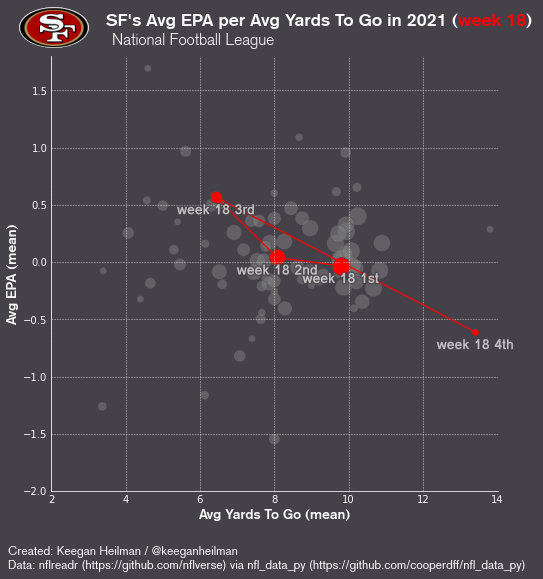

In [276]:
# add credits

font1 = "Mallanna"
font2 =  "AkzidenzGrotesk"
font3 = "Loma"
background = "#444148"
text_color = "#F8F9F9"
filler_color = "grey"
primary_color = "red"

title = "{}'s Avg EPA per Avg Yards To Go in {} (<week {}>)\n"
subtitle = "National Football League"
credits = "Created: Keegan Heilman / @keeganheilman\nData: nflreadr (https://github.com/nflverse) via nfl_data_py (https://github.com/cooperdff/nfl_data_py)"

mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color


fig, ax = plt.subplots(figsize=(8,8))
fig.set_facecolor(background)
ax.patch.set_facecolor(background)

ax.grid(ls="--", lw=0.5, color="lightgrey", zorder=1)

x = df.ydstogo.tolist()
y = df.epa.tolist()
size = (df.drive*10).tolist()

ax.scatter(x,y,s=size, color=filler_color, edgecolors=background, alpha=0.5, lw=0.5)

x = df[df.week == week].ydstogo.tolist()
y = df[df.week == week].epa.tolist()
size = (df[df.week == week]*10).drive.tolist()
t = zip(df[df.week == week].week, df[df.week == week].down)

ax.plot(x,y, color=primary_color, lw=1.25)

for point in zip(x,y,size,t):
    ax.scatter(point[0],point[1],color=primary_color,edgecolors=background,lw=0.5,s=point[2])
    wk = point[-1][0]
    dwn = int(point[-1][1])
    
    if dwn == 1:
        s = "week {} {}st"
    elif dwn == 2:
        s = u"week {} {}nd"
    elif dwn == 3:
        s = "week {} {}rd"
    else:
        s = "week {} {}th"
    # t = ax.text(point[0],point[1]-0.15,s.format(point[-1][0],),alpha=0.6, color=text_color, fontweight="bold", fontfamily=font3, fontsize=14,ha="center")
    t = ax.text(point[0],point[1]-0.15,s.format(point[-1][0],int(point[-1][1])),alpha=0.6, color=text_color, fontweight="bold", fontfamily=font3, fontsize=14,ha="center")
    t.set_path_effects([path_effects.withStroke(linewidth=3, foreground=background)])

htext.fig_text(s=title.format(team, season, week),x=0.22, y=0.955, highlight_textprops=[{"color":primary_color,"fontweight":"bold"}], color=text_color, fontsize=18, fontweight="bold", fontfamily=font2)
fig.text(0.23,0.90, subtitle, fontweight="light", color=text_color,fontfamily=font2, fontsize=16)

ax.set_xlabel("Avg Yards To Go (mean)", fontweight="bold",color=text_color,fontfamily=font2, fontsize=14)
ax.set_ylabel("Avg EPA (mean)" ,fontweight="bold",color=text_color,fontfamily=font2, fontsize=14)

ax.set_xlim(2,14)
ax.set_ylim(-2,1.8)

ax.tick_params(axis="both",length=0)

spines = ["top", "right", "bottom", "left"]
for s in spines:
    if s in ["top","right"]:
        ax.spines[s].set_visible(False)
    else:
        ax.spines[s].set_color(text_color)

# add logo
ax2 = fig.add_axes([0.07,0.87,0.12,0.12])
ax2.axis("off")
url ='https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/San_Francisco_49ers_logo.svg/100px-San_Francisco_49ers_logo.svg.png'
response = requests.get(url)
img = Image.open(BytesIO(response.content))
ax2.imshow(img)
             

fig.text(0.05, -0.01,credits, fontstyle="italic", fontsize=12, fontfamily=font2, color=text_color)
    
# plt.tight_layout()
plt.show()
plt.close('all')

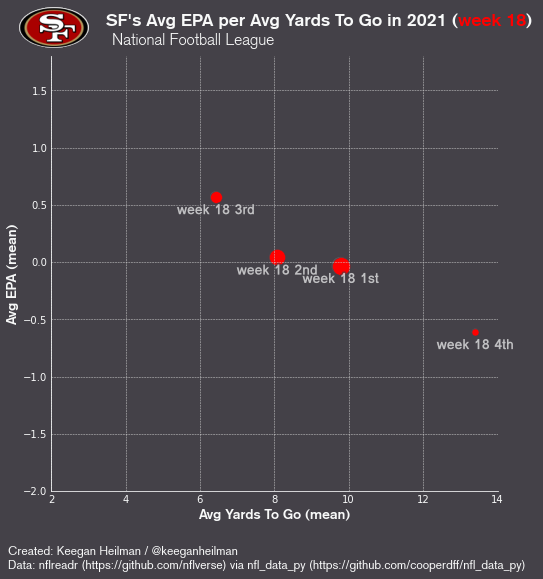

In [278]:
# adjust coloring of downs

font1 = "Mallanna"
font2 =  "AkzidenzGrotesk"
font3 = "Loma"
background = "#444148"
text_color = "#F8F9F9"
filler_color = "grey"
primary_color = "red"
first_down = "#CFF3F2"
second_down = "#B2D0CF"
third_down = "#8EA6A5"
fourth_down = "#549694"

title = "{}'s Avg EPA per Avg Yards To Go in {} (<week {}>)\n"
subtitle = "National Football League"
credits = "Created: Keegan Heilman / @keeganheilman\nData: nflreadr (https://github.com/nflverse) via nfl_data_py (https://github.com/cooperdff/nfl_data_py)"

mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color


fig, ax = plt.subplots(figsize=(8,8))
fig.set_facecolor(background)
ax.patch.set_facecolor(background)

ax.grid(ls="--", lw=0.5, color="lightgrey", zorder=1)

for dwn in df.down.unique():
    x = df[df.down == down].ydstogo.tolist()
    y = df[df.down == down].epa.tolist()
    size = (df[df.down == down]*10).drive.tolist()  
    
    dwn = int(dwn)
    if dwn == 1:
        down_color = first_down
    elif dwn == 2:
        down_color = second_down
    elif dwn == 3:
        down_color = third_down
    else:
        down_color = fourth_down
    ax.scatter(x,y,color=down_color,edgecolors=background,lw=0.5,s=size)
    
ax.scatter(x,y,s=size, color=filler_color, edgecolors=background, alpha=0.5, lw=0.5)
    
# for wk in df.week.unique():
#     x = df[df.week == wk].ydstogo.tolist()
#     y = df[df.week == wk].epa.tolist()
#     if week == wk:
#         ax.plot(x,y, color=primary_color, lw=1.25)
#     else:
#         ax.plot(x,y, color=filler_color, lw=1.25, alpha=0.3)
        

x = df[df.week == week].ydstogo.tolist()
y = df[df.week == week].epa.tolist()
size = (df[df.week == week]*10).drive.tolist()
t = zip(df[df.week == week].week, df[df.week == week].down)
        
for point in zip(x,y,size,t):
    ax.scatter(point[0],point[1],color=primary_color,edgecolors=background,lw=0.5,s=point[2])
    wk = point[-1][0]
    dwn = int(point[-1][1])
    if dwn == 1:
        s = "week {} {}st"
    elif dwn == 2:
        s = u"week {} {}nd"
    elif dwn == 3:
        s = "week {} {}rd"
    else:
        s = "week {} {}th"
    # t = ax.text(point[0],point[1]-0.15,s.format(point[-1][0],),alpha=0.6, color=text_color, fontweight="bold", fontfamily=font3, fontsize=14,ha="center")
    t = ax.text(point[0],point[1]-0.15,s.format(point[-1][0],int(point[-1][1])),alpha=0.6, color=text_color, fontweight="bold", fontfamily=font3, fontsize=14,ha="center")
    t.set_path_effects([path_effects.withStroke(linewidth=3, foreground=background)])

    
htext.fig_text(s=title.format(team, season, week),x=0.22, y=0.955, highlight_textprops=[{"color":primary_color,"fontweight":"bold"}], color=text_color, fontsize=18, fontweight="bold", fontfamily=font2)
fig.text(0.23,0.90, subtitle, fontweight="light", color=text_color,fontfamily=font2, fontsize=16)

ax.set_xlabel("Avg Yards To Go (mean)", fontweight="bold",color=text_color,fontfamily=font2, fontsize=14)
ax.set_ylabel("Avg EPA (mean)" ,fontweight="bold",color=text_color,fontfamily=font2, fontsize=14)

ax.set_xlim(2,14)
ax.set_ylim(-2,1.8)

ax.tick_params(axis="both",length=0)

spines = ["top", "right", "bottom", "left"]
for s in spines:
    if s in ["top","right"]:
        ax.spines[s].set_visible(False)
    else:
        ax.spines[s].set_color(text_color)

# add logo
ax2 = fig.add_axes([0.07,0.87,0.12,0.12])
ax2.axis("off")
url ='https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/San_Francisco_49ers_logo.svg/100px-San_Francisco_49ers_logo.svg.png'
response = requests.get(url)
img = Image.open(BytesIO(response.content))
ax2.imshow(img)
             

fig.text(0.05, -0.01,credits, fontstyle="italic", fontsize=12, fontfamily=font2, color=text_color)
    
# plt.tight_layout()
plt.show()
plt.close('all')